In [66]:
import matplotlib as matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [67]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'

           salePrice  overallQual     1stFlrSf  totRmsAbvGrd    yearBuilt  \
count    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   180921.195890     6.099315  1162.626712      6.517808  1971.267808   
std     79442.502883     1.382997   386.587738      1.625393    30.202904   
min     34900.000000     1.000000   334.000000      2.000000  1872.000000   
25%    129975.000000     5.000000   882.000000      5.000000  1954.000000   
50%    163000.000000     6.000000  1087.000000      6.000000  1973.000000   
75%    214000.000000     7.000000  1391.250000      7.000000  2000.000000   
max    755000.000000    10.000000  4692.000000     14.000000  2010.000000   

       lotFrontage  
count  1201.000000  
mean     70.049958  
std      24.284752  
min      21.000000  
25%      59.000000  
50%      69.000000  
75%      80.000000  
max     313.000000  
salePrice         0
overallQual       0
1stFlrSf          0
totRmsAbvGrd      0
yearBuilt         0
lotFrontage     2

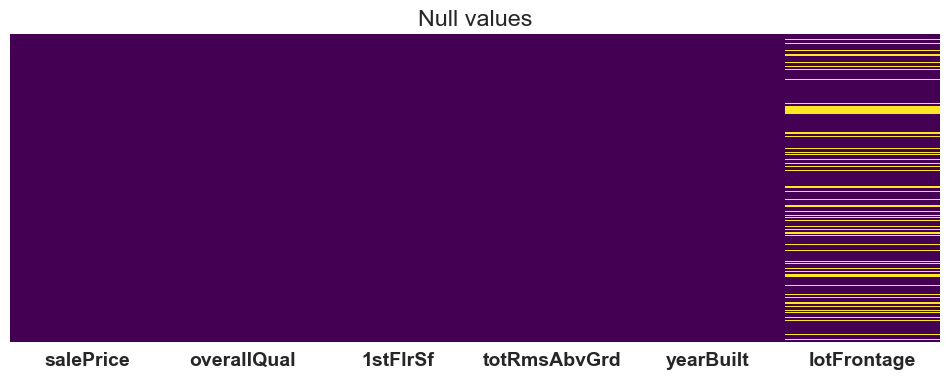

<Figure size 800x500 with 0 Axes>

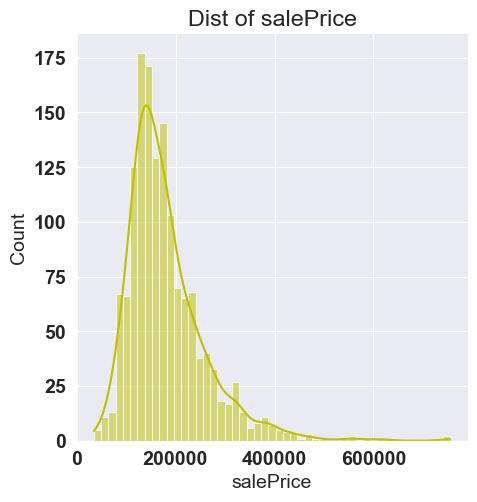

<Figure size 800x500 with 0 Axes>

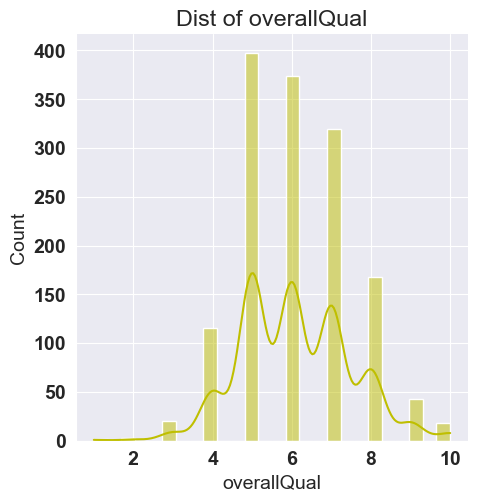

<Figure size 800x500 with 0 Axes>

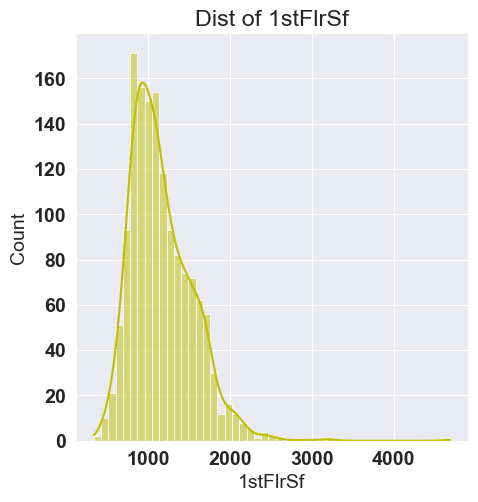

<Figure size 800x500 with 0 Axes>

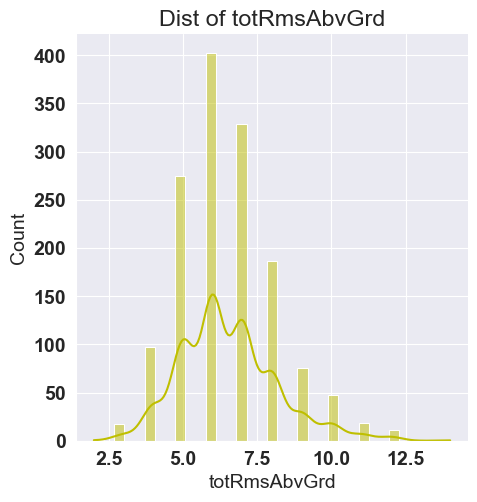

<Figure size 800x500 with 0 Axes>

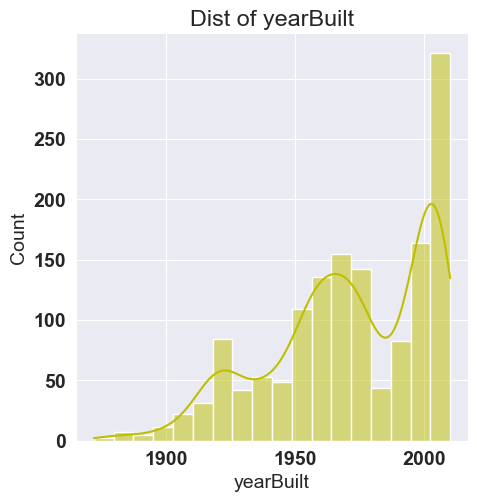

<Figure size 800x500 with 0 Axes>

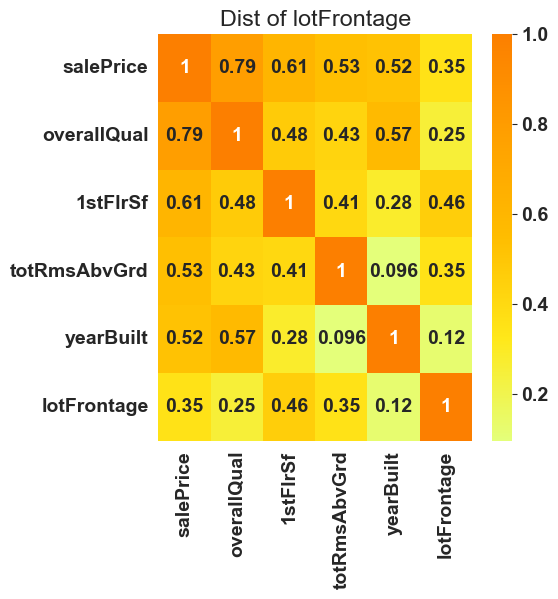

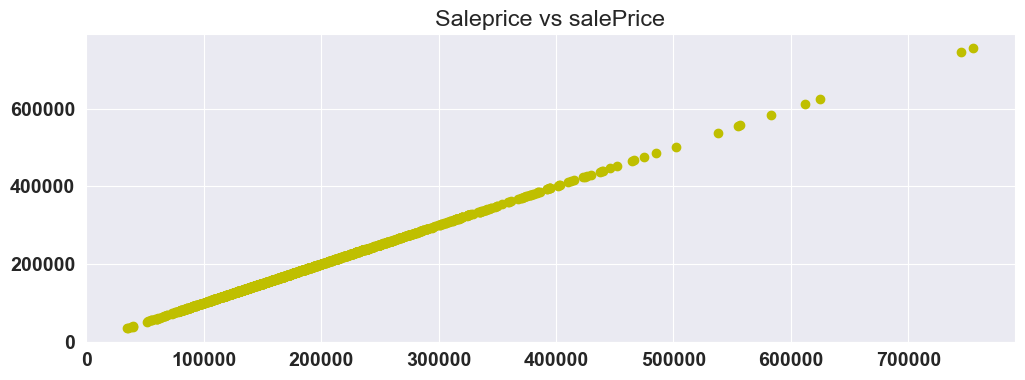

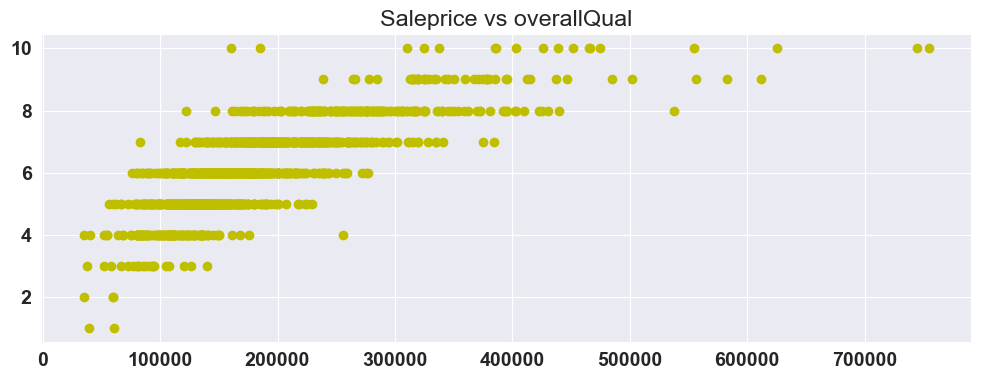

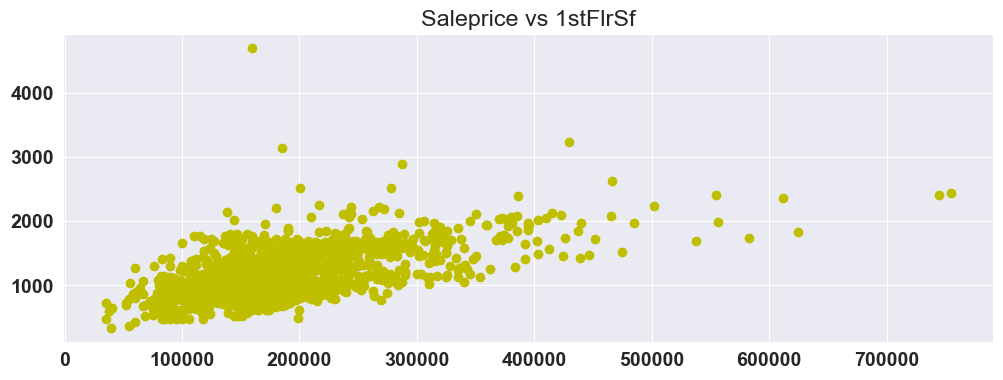

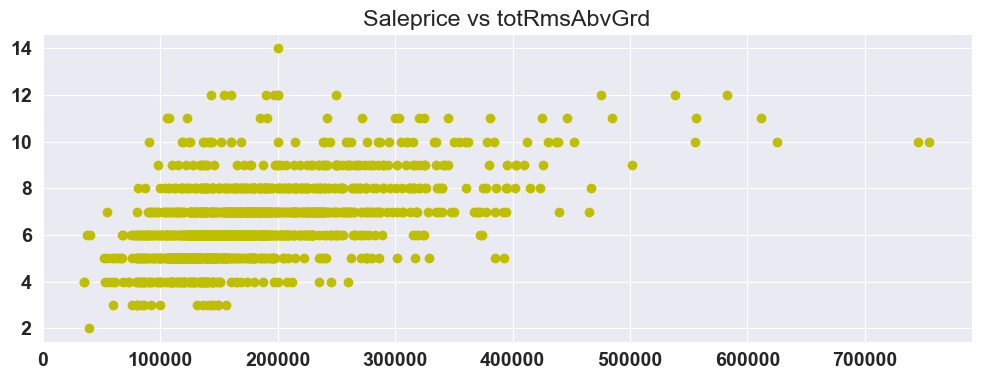

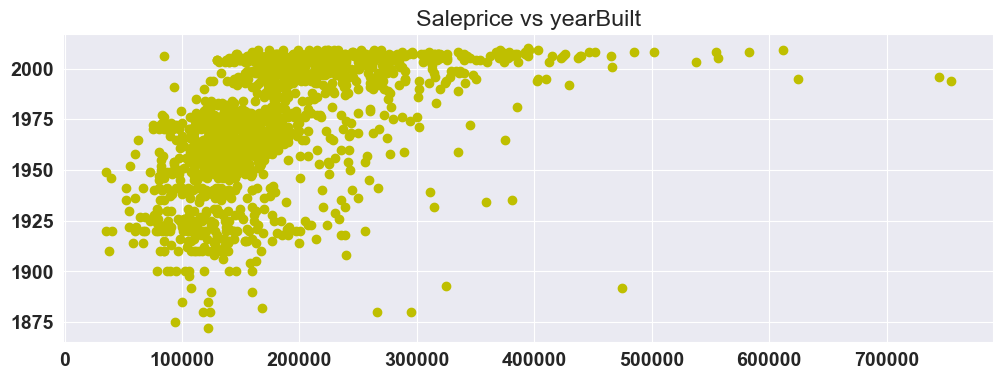

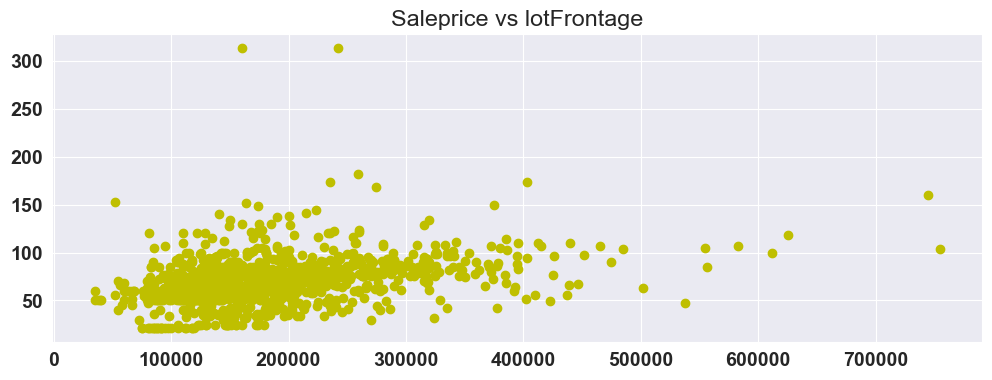

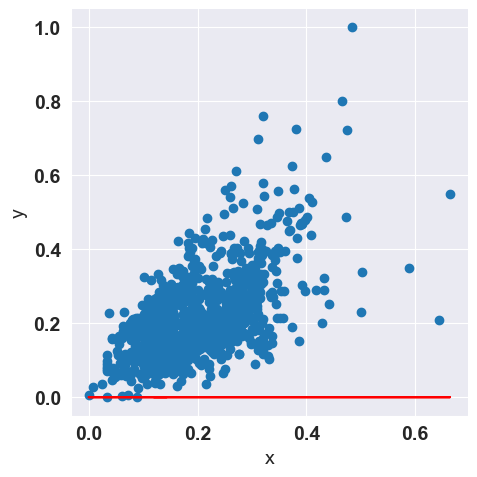

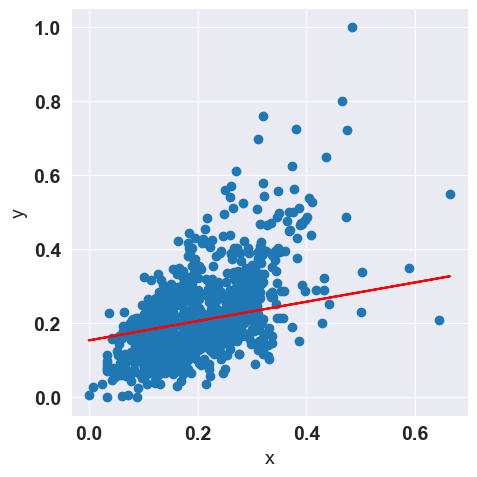

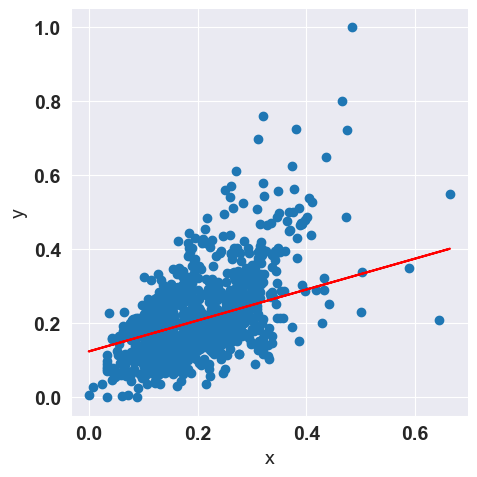

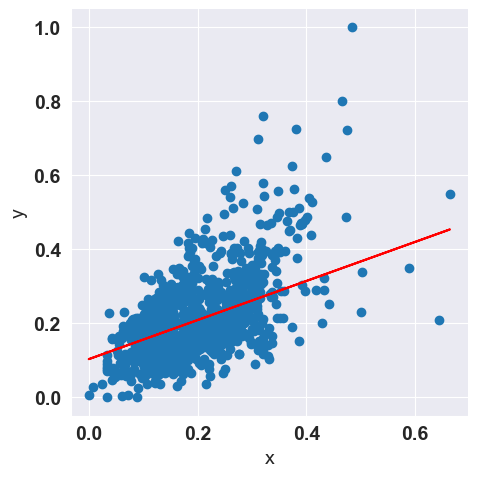

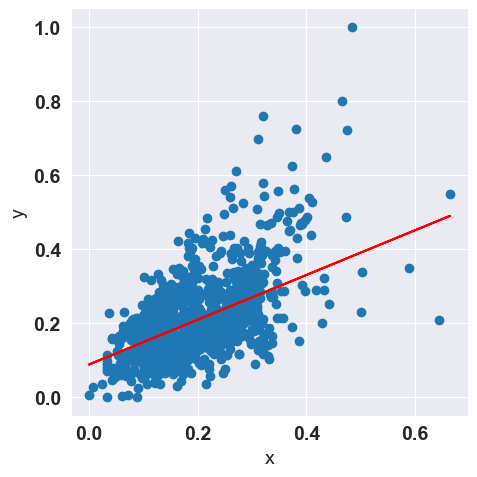

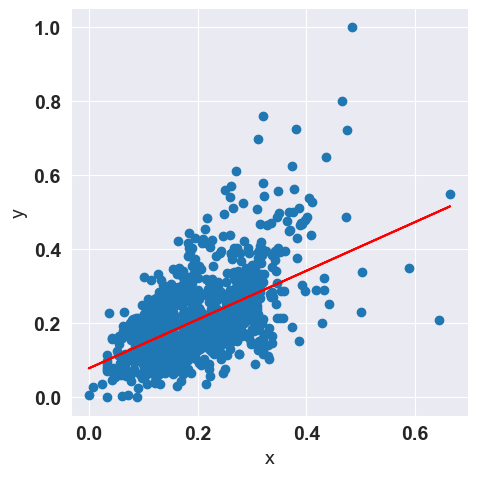

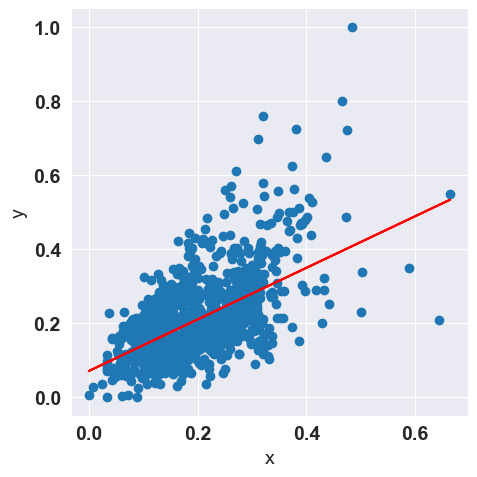

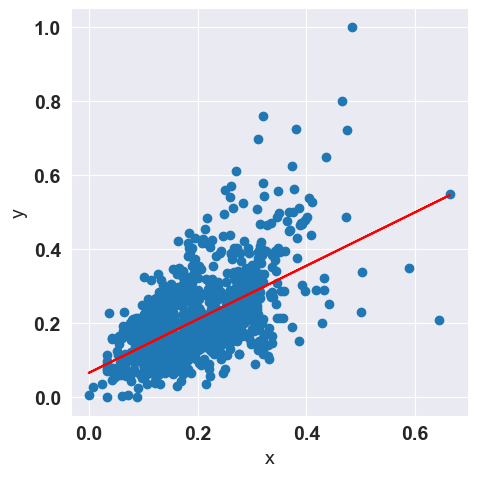

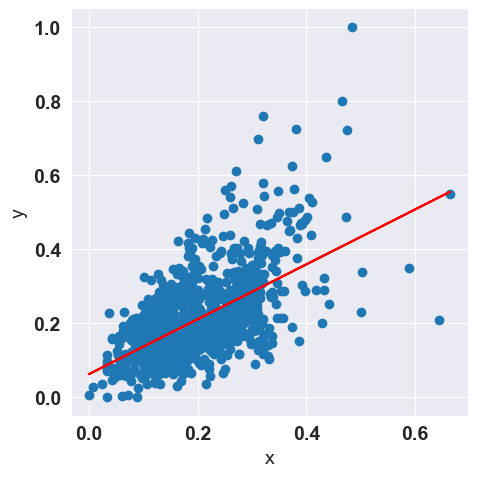

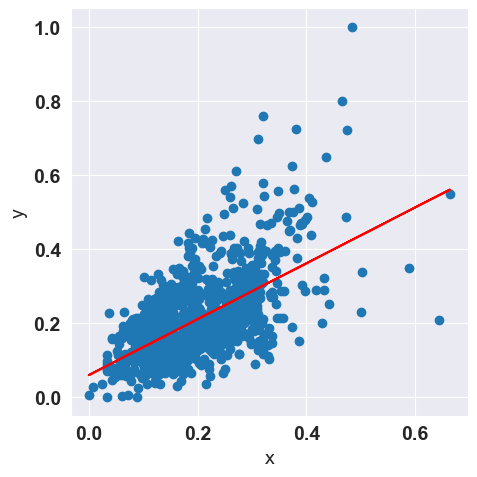

[0.05799358 0.76502523]
[0.026451229032724462, 0.010565089804621187, 0.006862169047807185, 0.005990606463641845, 0.005777106315490884, 0.005716612050611836, 0.005691752143288475, 0.005675249873517239, 0.005660765814711715, 0.00564682619837794, 0.0056330879986312395, 0.005619470968624579, 0.0056059559329485285, 0.005592537912422545, 0.00557921523065675, 0.00556598698248053, 0.005552852445600181, 0.005539810943847132, 0.005526861815372266, 0.005514004405229063, 0.0055012380636246415, 0.005488562145488186, 0.0054759760103456874, 0.005463479022266044, 0.005451070549823932, 0.0054387499660667315, 0.005426516648482586, 0.00541436997896888, 0.005402309343800999, 0.005390334133601313, 0.0053784437433083915, 0.005366637572146425, 0.005354915023594874, 0.005343275505358334, 0.005331718429336596, 0.005320243211594944, 0.005308849272334647, 0.005297536035863664, 0.005286302930567554, 0.0052751493888806, 0.005264074847257126, 0.005253078746143029, 0.0052421605299475, 0.005231319647014963, 0.0052205

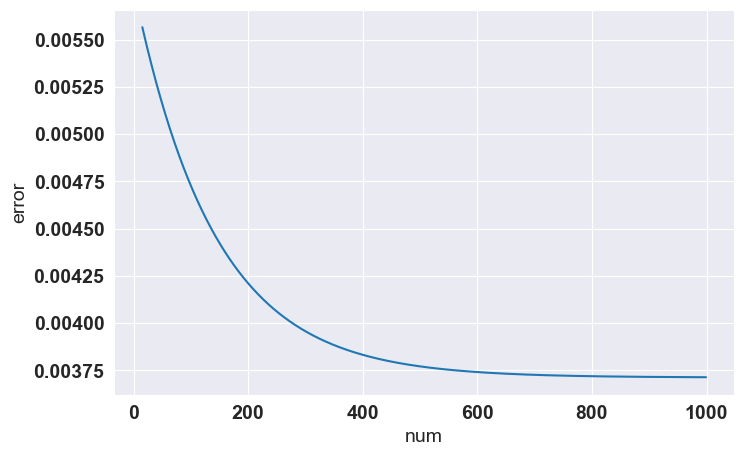

[[0.11977972]
 [0.21294172]
 [0.13446535]
 ...
 [0.26801285]
 [0.31206976]
 [0.14341441]]
[[0.24107763]
 [0.20358284]
 [0.26190807]
 ...
 [0.27533676]
 [0.29225108]
 [0.19177892]]
coeff [[0.78645676]]
mse 0.00990309978221608
             x    y_true  y_manual      y_sk
1168  0.206976  0.277878  0.216335  0.216698
1169  0.343506  0.819470  0.320784  0.324073
1170  0.179899  0.189002  0.195621  0.195404
1171  0.212712  0.177892  0.220724  0.221210
1172  0.066774  0.190251  0.109077  0.106435
...        ...       ...       ...       ...
1455  0.142038  0.194556  0.166656  0.165627
1456  0.399036  0.243161  0.363266  0.367745
1457  0.195961  0.321622  0.207909  0.208036
1458  0.170721  0.148903  0.188599  0.188185
1459  0.211565  0.156367  0.219846  0.220307

[292 rows x 4 columns]
manual error: 0.0043960243531605886
sk mse 0.008843103355281016


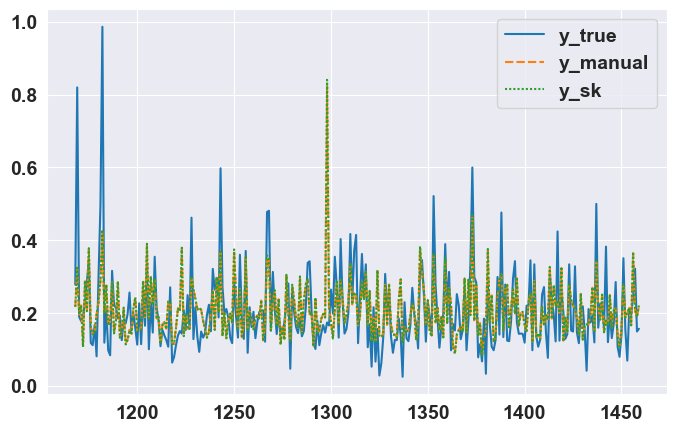

In [68]:
class simpleLinearRegression:

    def __init__(self):
        self.data = np.load('proyecto_training_data.npy')
        self.df = pd.DataFrame(self.data, columns=['salePrice', 'overallQual', '1stFlrSf', 'totRmsAbvGrd', 'yearBuilt', 'lotFrontage'])
        self.train = None
        self.test = None
        self.error_vector = []
        self.b0b1_final = None
        self.sklearn_final = None

    #Eda functions
    def dataDescribe(self):
        print(self.df.describe())

    def eda_nulls(self):
        plt.figure(figsize=(12,4))
        sns.heatmap(self.df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title('Null values')
        print(self.df.isna().sum())

    def eda_displot(self):
        for column in self.df.columns:
            plt.figure()
            sns.displot(data=self.df[column], kde=True, color='y')
            plt.title('Dist of '+column)

    def eda_corr(self):
        corr = self.df.corr()
        sns.heatmap(corr, cmap='Wistia', annot=True)

    def eda_scatter(self):
        for column in self.df.columns:
            plt.figure(figsize=(12,4))
            plt.scatter(x='salePrice',y=column, c='y', data=self.df )
            plt.title('Saleprice vs '+ column)

    #Model functions
    def normalize(self, df):
        return (self.df-self.df.min())/(self.df.max()-self.df.min())

    def train_test_split(self):
        df_normalizado = self.normalize(self.df)
        self.train, self.test = np.split(df_normalizado, [int(0.80*len(df_normalizado))])
        return self.train, self.test

    def linear_reg_model(self, x, y, epochs, imprimir_error_cada, learning_rate):
        model_result = {}
        B = np.ones(len(x))
        A = np.stack([B,x]).T

        A_rows, A_columns = A.shape
        b0b1 = np.zeros(A_columns)
        data_train = pd.DataFrame({'x':x, 'y': y})

        for i in range(epochs):
            y_pred = A.dot(b0b1)
            error = y_pred - y.values
            gd = A.T.dot(error) / A_rows
            b0b1 -= learning_rate * gd

            error = np.sum((y - y_pred) ** 2) / (2 * A_rows)
            self.error_vector.append(error)
            if i % imprimir_error_cada == 0:
                g = sns.FacetGrid(data_train, height=5)
                g = g.map(plt.scatter, 'x', 'y')
                plt.plot(x, y_pred, color='r')
                plt.show()

            #dict de modelos
            model_result[i] = b0b1

        self.b0b1_final = b0b1
        print(b0b1)
        print(self.error_vector)
        print(min(self.error_vector))
        print(max(self.error_vector))

        #print(model_result)

        x_axis = range(0,epochs)
        print(x_axis)
        print(len(self.error_vector))
        data = {'num':x_axis, 'error':self.error_vector}
        df_data = pd.DataFrame(data)
        df_data = df_data.iloc[15:, :]
        sns.lineplot(data=df_data, x='num', y='error')
        plt.show()

        return model_result, self.error_vector, self.b0b1_final


    def manual_pred(self, x_test):
        print(x_test)
        B = np.ones(len(x_test))
        A = np.stack([B,x_test]).T
        y_pred = A.dot(r.b0b1_final)
        print(y_pred)

    def sklearn_model(self, x, y, x_test, y_test):
        x = x.values.reshape(-1,1)
        y = y.values.reshape(-1,1)
        x_test = x_test.values.reshape(-1,1)
        y_test = y_test.values.reshape(-1,1)
        print(x)
        print(y)

        regr = linear_model.LinearRegression()
        regr.fit(x,y)
        #self.sklearn_final = regr
        y_pred_sk = regr.predict(x_test)

        print('coeff', regr.coef_)
        print('mse', mean_squared_error(y_test, x_test))
        return regr

    def predict_compare(self, x_test, manual_md, sklearn_md):
        B = np.ones(len(x_test))
        A = np.stack([B,x_test]).T
        y_pred = A.dot(manual_md)

        x_test = x_test.values.reshape(-1,1)
        y_sk_pred = sklearn_md.predict(x_test)
        y_sk_pred = y_sk_pred.reshape(-1)


        y_avg = (y_pred + y_sk_pred) / 2.0

        return y_pred, y_sk_pred, y_avg

    def graph_compare(self, y_test, x_test, manual, sk_md):
        df = pd.DataFrame({"x": x_test,
                           "y_true": y_test,
                           "y_manual": manual,
                           "y_sk": sk_md })

        print(df)
        sns.lineplot(data=df[["y_true", "y_manual", "y_sk"]])

        manual_error = np.sum((y_test - manual) ** 2) / (2 * len(manual))
        print("manual error:", manual_error)
        print('sk mse', mean_squared_error(y_test, sk_md))


r = simpleLinearRegression()
#print(r.data)
r.dataDescribe()
r.eda_nulls()
r.eda_displot()
r.eda_corr()
r.eda_scatter()
train, test = r.train_test_split()

md1_result, error_vector_1, manual_md = r.linear_reg_model(train['1stFlrSf'],train['salePrice'],1000,100, 0.5)

sklearn_md = r.sklearn_model(train['1stFlrSf'],train['salePrice'], test['1stFlrSf'],test['salePrice'])

manual_result, sk_result, avg_result = r.predict_compare(test['1stFlrSf'], manual_md, sklearn_md)

r.graph_compare(test['salePrice'], test['1stFlrSf'], manual_result, sk_result)







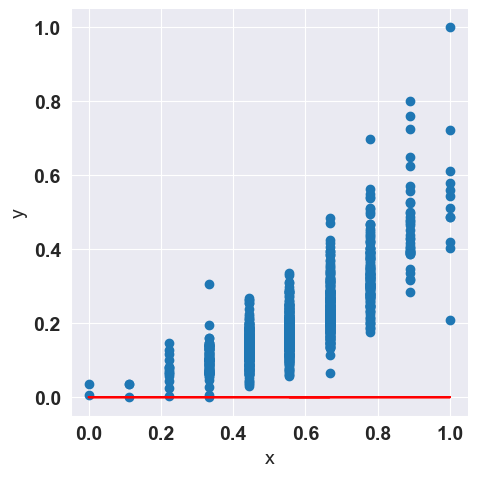

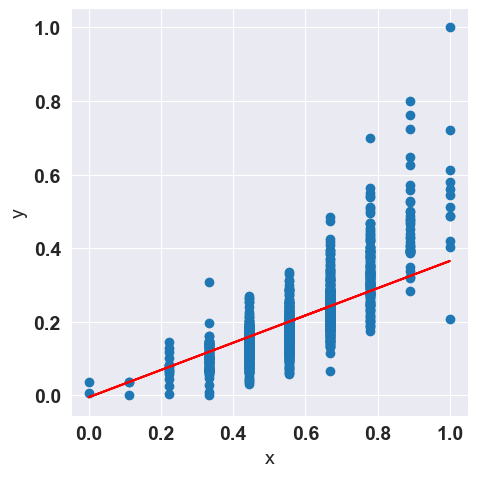

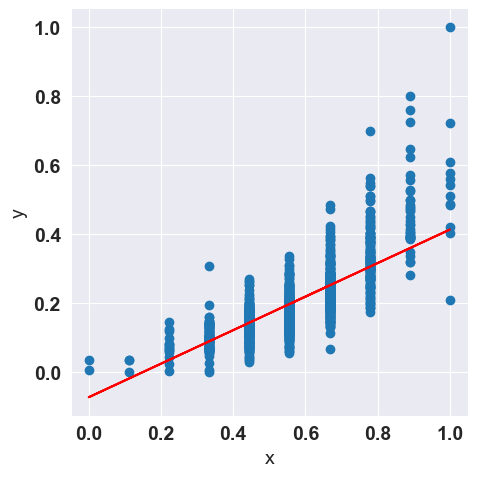

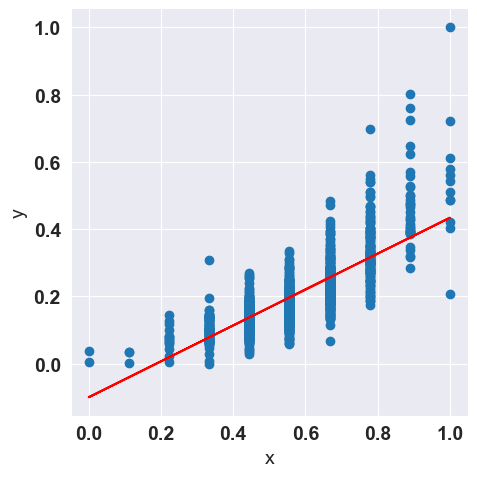

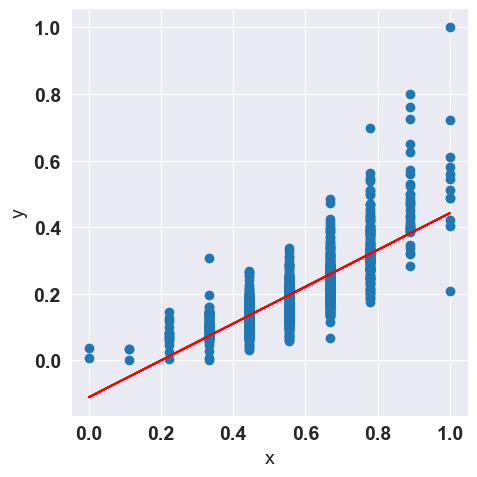

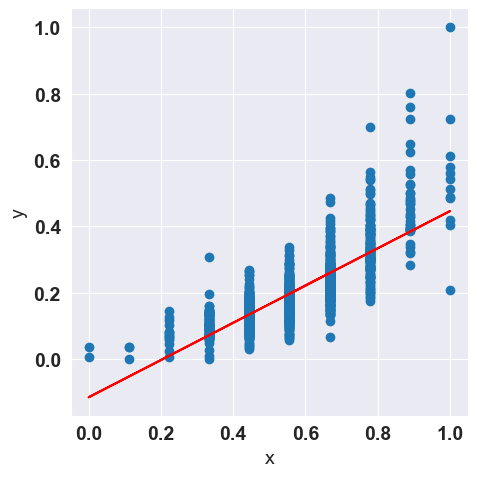

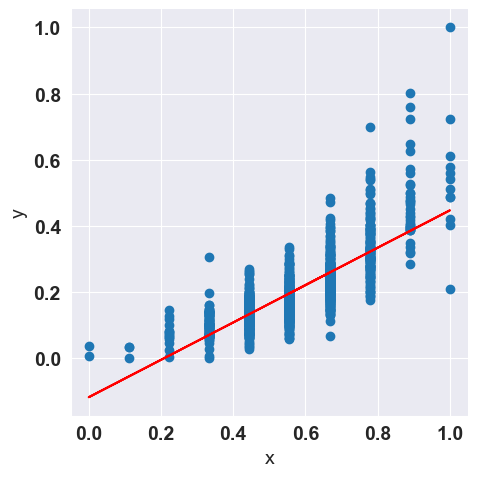

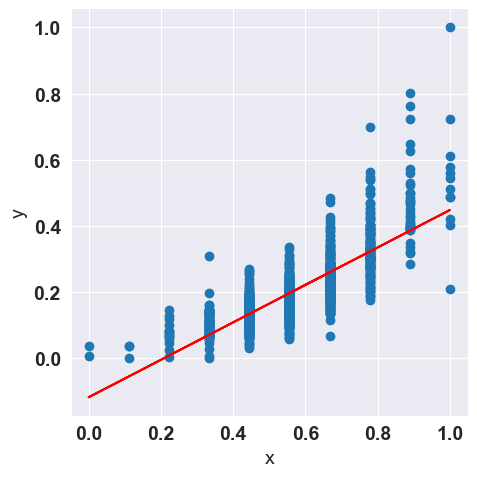

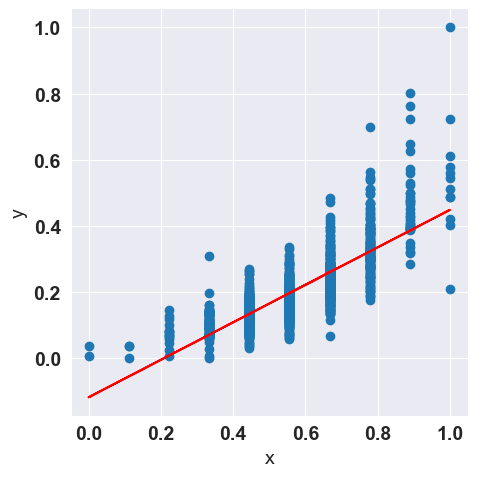

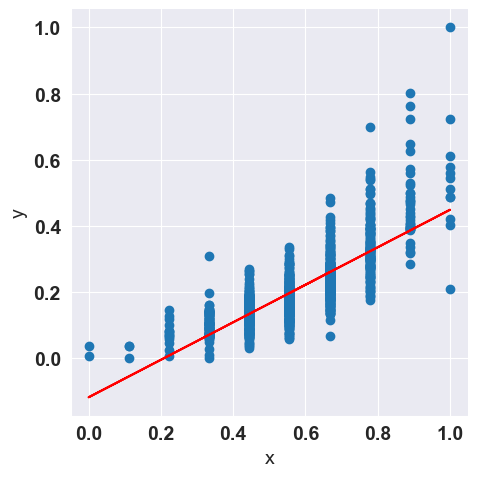

[-0.11933002  0.56750371]
[0.026451229032724462, 0.007287670823163293, 0.0050768511722187075, 0.0047862753587981244, 0.004713832146690416, 0.004666782537079661, 0.004623290876124671, 0.004580872760250729, 0.0045392350991449665, 0.004498333127535888, 0.004458150400977308, 0.00441867388164559, 0.004379891113842303, 0.0043417899007306944, 0.004304358264342428, 0.004267584437717988, 0.004231456860744091, 0.0041959641764671785, 0.004161095227517345, 0.004126839052600271, 0.004093184883051383, 0.004060122139450641, 0.004027640428296831, 0.0039957295387402884, 0.003964379439373051, 0.003933580275075415, 0.003903322363917911, 0.003873596194117723, 0.0038443924210485965, 0.003815701864303283, 0.003787515504807625, 0.003759824481985343, 0.003732620090972651, 0.003705893779881827, 0.0036796371471128657, 0.0036538419387123744, 0.003628500045778896, 0.0036036035019138073, 0.0035791444807170354, 0.0035551152933267723, 0.0035315083860024262, 0.0035083163377500537, 0.003485531857989522, 0.003463147784

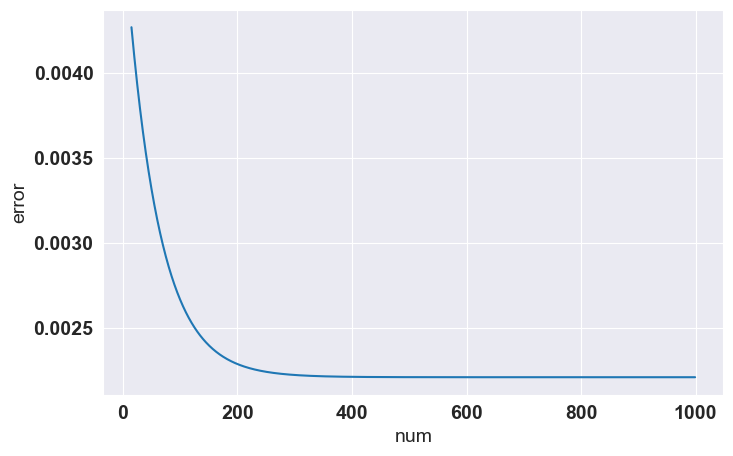

[[0.66666667]
 [0.55555556]
 [0.66666667]
 ...
 [0.66666667]
 [0.77777778]
 [0.55555556]]
[[0.24107763]
 [0.20358284]
 [0.26190807]
 ...
 [0.27533676]
 [0.29225108]
 [0.19177892]]
coeff [[0.56757116]]
mse 0.14004836216712618
             x    y_true  y_manual      y_sk
1168  0.555556  0.277878  0.195950  0.195948
1169  1.000000  0.819470  0.448174  0.448202
1170  0.555556  0.189002  0.195950  0.195948
1171  0.555556  0.177892  0.195950  0.195948
1172  0.666667  0.190251  0.259006  0.259012
...        ...       ...       ...       ...
1455  0.555556  0.194556  0.195950  0.195948
1456  0.555556  0.243161  0.195950  0.195948
1457  0.666667  0.321622  0.259006  0.259012
1458  0.444444  0.148903  0.132894  0.132885
1459  0.444444  0.156367  0.132894  0.132885

[292 rows x 4 columns]
manual error: 0.00253612327196886
sk mse 0.005072245669077616


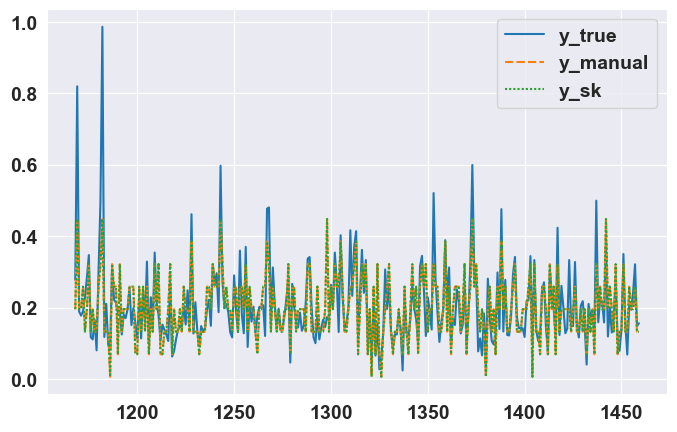

In [69]:
r2 = simpleLinearRegression()
#print(r.data)

train2, test2 = r2.train_test_split()

md2_result, error_vector_2, manual_md2 = r2.linear_reg_model(train2['overallQual'],train2['salePrice'],1000,100, 0.5)

sklearn_md2 = r2.sklearn_model(train2['overallQual'],train2['salePrice'], test2['overallQual'],test2['salePrice'])

manual_result2, sk_result2, avg_result2 = r2.predict_compare(test2['overallQual'], manual_md2, sklearn_md2)

r2.graph_compare(test2['salePrice'], test2['overallQual'], manual_result2, sk_result2)